In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
a = pd.read_csv("Admission_Predict.csv")

In [3]:
a.columns = a.columns.str.strip()

In [4]:
a["Chance of Admit"] = a["Chance of Admit"].apply(lambda x: 1 if x >= 0.75 else 0)

In [5]:
X = a[['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
Y = a[['Chance of Admit']]

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [7]:
model = DecisionTreeClassifier(criterion="entropy", random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [14]:
y_predict = model.predict(X_test)
acc = accuracy_score(Y_test, y_predict)


In [11]:
print(f"Model Accuracy: {acc*100:.2f}%\n")
print("Classification Report:\n", classification_report(Y_test, y_predict))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_predict))

Model Accuracy: 85.00%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        44
           1       0.88      0.78      0.82        36

    accuracy                           0.85        80
   macro avg       0.85      0.84      0.85        80
weighted avg       0.85      0.85      0.85        80

Confusion Matrix:
 [[40  4]
 [ 8 28]]


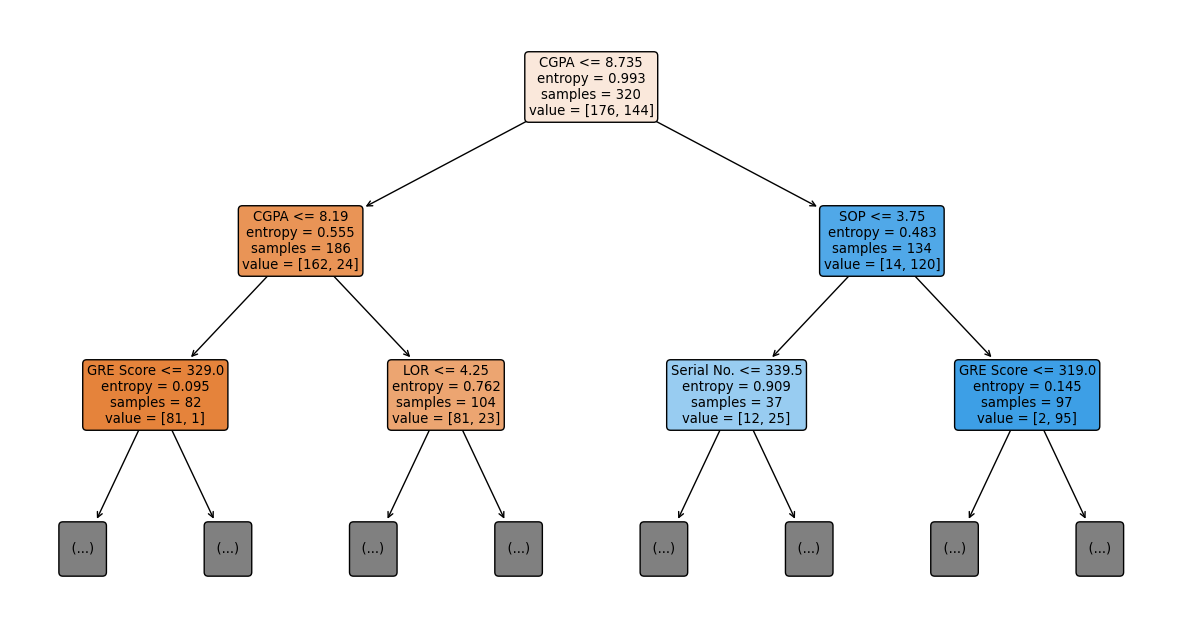

In [12]:
plt.figure(figsize=(15, 8))
plot_tree(model, filled=True, feature_names=X.columns, max_depth=2, rounded=True)
plt.show()